In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5285,spam,URGENT! You have won a 1 week FREE membership ...,NaN,NaN,NaN
5465,ham,Shall I bring us a bottle of wine to keep us a...,NaN,NaN,NaN
1499,spam,"SMS. ac JSco: Energy is high, but u may not kn...",NaN,NaN,NaN
3881,ham,Short But Cute: \Be a good person,"but dont try to prove it..\"" .Gud noon....""",NaN,NaN
770,ham,Not getting anywhere with this damn job huntin...,NaN,NaN,NaN


In [6]:
df.shape

(5574, 5)

## Data Cleaning ali


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5574 non-null   object
 1   v2          5574 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [13]:
#clean cloumns
df.drop(columns=['Unnamed: 4','Unnamed: 3','Unnamed: 2'],inplace=True)

In [16]:
df.sample(5)

,v1,v2
3768,ham,Was gr8 to see that message. So when r u leavi...
255,ham,Don't necessarily expect it to be done before ...
423,spam,URGENT! Your Mobile number has been awarded wi...
798,ham,Ok i msg u b4 i leave my house.
1945,ham,Can �_ call me at 10:10 to make sure dat i've ...


In [17]:
df.rename(columns={'v1' : 'target', 'v2':'Text'},inplace=True)
df.sample(5)

,target,Text
2142,ham,You see the requirements please
313,ham,"Hi the way I was with u 2day, is the normal wa..."
1481,ham,"I'm a guy, browsin is compulsory"
1657,ham,S:-)if we have one good partnership going we w...
2014,ham,Ambrith..madurai..met u in arun dha marrge..re...


In [18]:
df.isnull().sum()

target    0
Text      0
dtype: int64

In [20]:
#duplicate values checking
df.duplicated().sum()

403

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
df['target'] = encoder.fit_transform(df['target'])

In [23]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.shape

(5574, 2)

## EDA

In [25]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['target'].value_counts()

0    4825
1     749
Name: target, dtype: int64

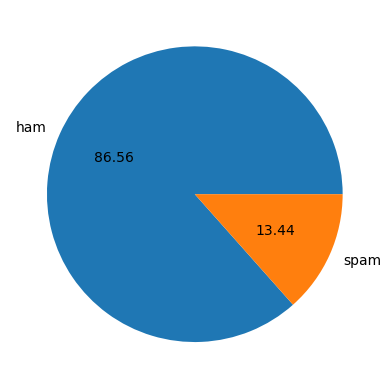

In [30]:
#check this in graph
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [32]:
#data imblanced
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\REHMAN
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
#character,words,sentences
df['no_characters'] = df['Text'].apply(len)

In [37]:
#no of characters show
df.head() 

,target,Text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
#convert it into words
df['no_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [43]:
df.head()

,target,Text,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['no_sentece'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [46]:
df[['no_characters','no_words','no_sentece']]

,no_characters,no_words,no_sentece
0,111,24,24
1,29,8,8
2,155,37,37
3,49,13,13
4,61,15,15
...,...,...,...
5569,57,15,15
5570,125,27,27
5571,26,7,7
5572,31,6,6


In [48]:
#des ham mesage
df[df['target']==0][['no_characters','no_words','no_sentece']].describe()

,no_characters,no_words,no_sentece
count,4825.000000,4825.000000,4825.000000
mean,71.021762,17.271917,17.271917
std,58.015364,13.988885,13.988885
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,92.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [49]:
#des for spam
df[df['target']==1][['no_characters','no_words','no_sentece']].describe()

,no_characters,no_words,no_sentece
count,749.000000,749.000000,749.000000
mean,138.114820,27.837116,27.837116
std,29.648253,6.978589,6.978589
min,10.000000,1.000000,1.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,223.000000,46.000000,46.000000


<AxesSubplot:xlabel='no_characters', ylabel='Count'>

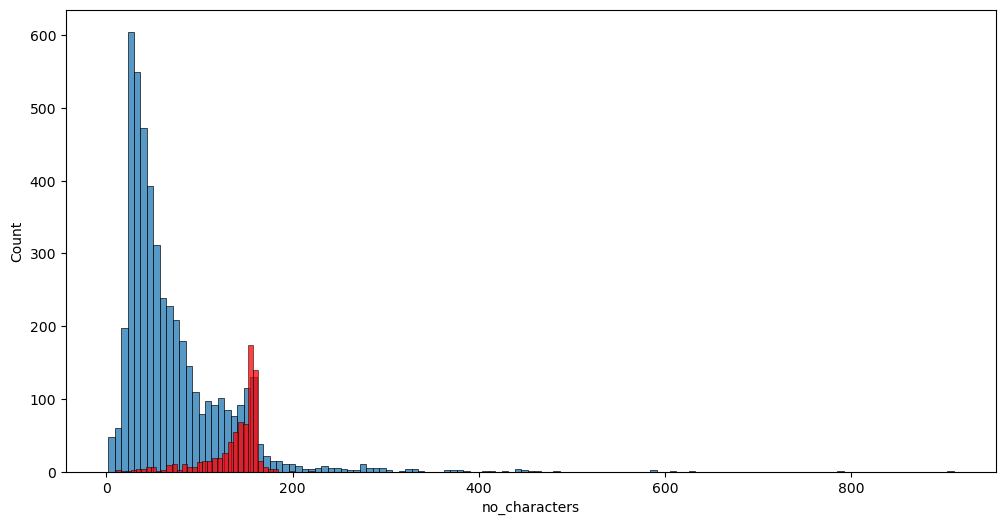

In [52]:
#show using graph
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['no_characters'])
sns.histplot(df[df['target'] == 1]['no_characters'],color='red')

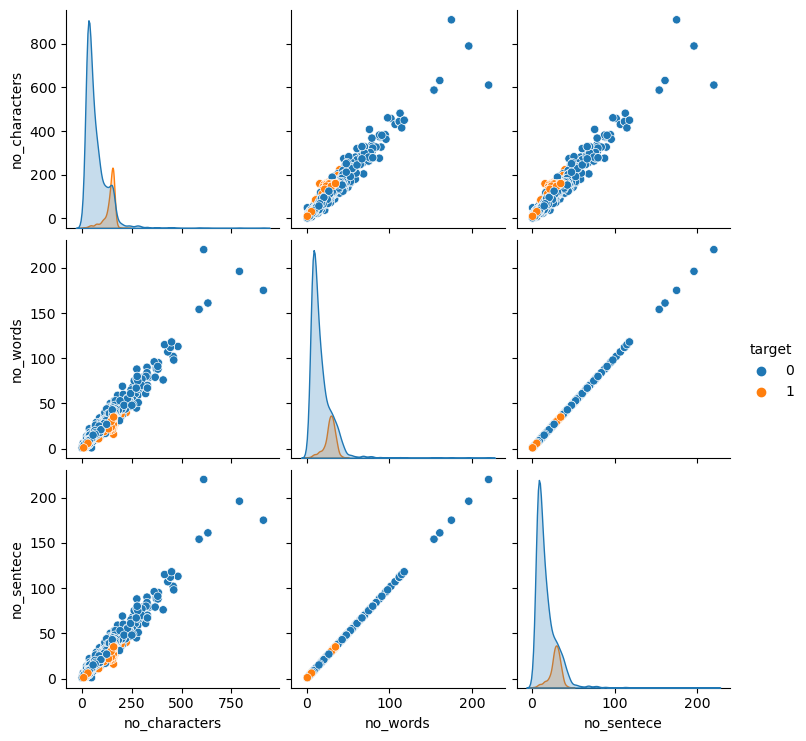

In [53]:
#show realtionship
sns.pairplot(df,hue='target')

<AxesSubplot:>

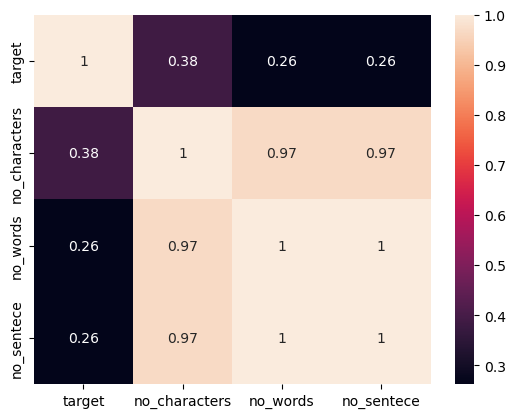

In [55]:
#chechk coffiicent
sns.heatmap(df.corr(),annot=True)

## Data processing 

In [56]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [73]:
import string
string.punctuation
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\REHMAN
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [81]:
transform_text('did ali are working hard and best in playing circket')

'ali work hard best play circket'

In [79]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('ali studying')

'ali studi'

In [83]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [84]:
df.head()

,target,Text,no_characters,no_words,no_sentece,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [90]:
pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [91]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [92]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

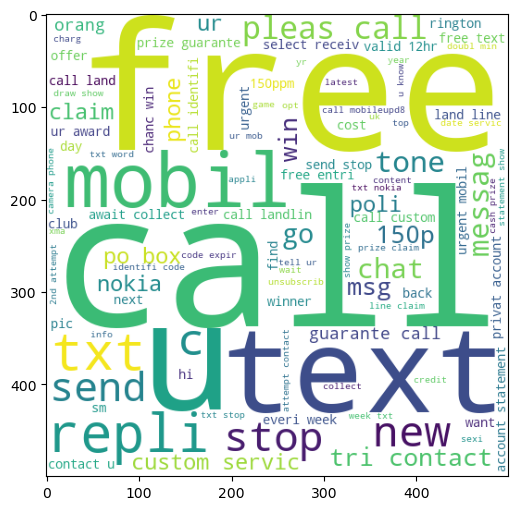

In [94]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [95]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

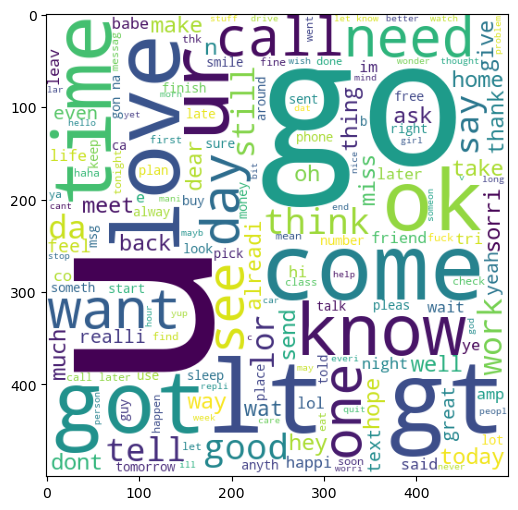

In [96]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [97]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [98]:
len(spam_corpus)

11498

F:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


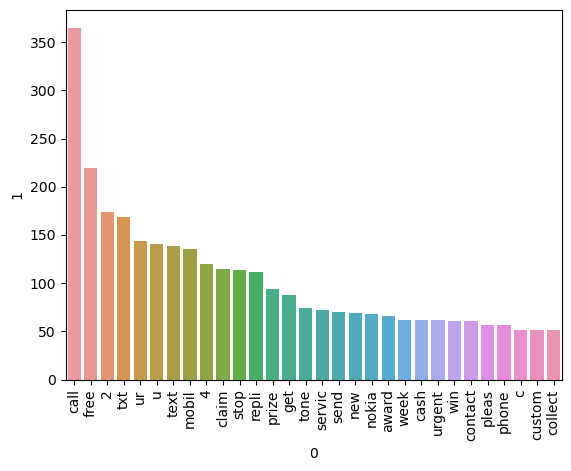

In [99]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()